# Цели и задачи

**Цель:** изучить модель эффективности рекламы, а также реализовать её программно.

**Задачи:**

* изучить теорию о модели эффективности рекламы
* построить модель для 3 различных случаев $\alpha_1(t)$ и $\alpha_2(t)$

# Теоретическая справка

Модель рекламной кампании описывается следующими величинами: 

Считаем, что $\frac{dn}{dt}$ - скорость изменения со временем числа потребителей, узнавших о товаре и готовых его купить, $t$ - время, прошедшее с начала рекламной кампании, $n(t)$ - число уже информированных клиентов. Эта величина пропорциональна числу покупателей, еще не знающих о нем, это описывается следующим образом: $\alpha_1(t)(N - n(t))$, где $N$ - общее число потенциальных платежеспособных покупателей, $\alpha_1(t) \gt 0$ - характеризует интенсивность рекламной кампании (зависит от затрат на рекламу в данный момент времени). Помимо этого, узнавшие о товаре потребители также распространяют полученную информацию среди потенциальных покупателей, не знающих о нем (в этом случае работает т.н. сарафанное радио). Этот вклад в рекламу описывается величиной $\alpha_2(t)n(t)(N-n(t))$, эта величина увеличивается с увеличением потребителей узнавших о товаре. Математическая модель распространения рекламы описывается уравнением:

$$
\frac{dn}{dt} = (\alpha_1(t)+\alpha_2(t)n(t))(N-n(t))
$$

При $\alpha_1(t) \gg \alpha_2(t)$ получается модель типа модели Мальтуса, В обратном случае, при $\alpha_1(t) \ll \alpha_2(t)$ получаем уравнение логистической кривой.

# Программная реализация

## Подготовка к моделированию

Все данные соответствуют варианту 14 = $(1032186063\mod{70}) + 1$.

**Инициализация библиотек**

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import sin
from scipy.misc import derivative

from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1.2, gridlines='--')

**Начальные данные и необходимые функции**

In [80]:
N = 648
t0 = 0
N0 = 12

def k(t):
    return 0.125

def p(t):
    return 0.00002

t = np.arange(0, 30, 0.01)

Объявим необходимые функции, исходя из данной нам информации в теоретической справке.

In [81]:
def XD(x,t):
    xd = (k(t) + p(t)*x)*(N-x)
    return xd

Заложим в переменные решения для наших СДУ с помощью функции `odeint` модуля `scipy.integrate`.

In [82]:
x = odeint(XD, N0, t)

## Построение графиков для модели

### Модель 1

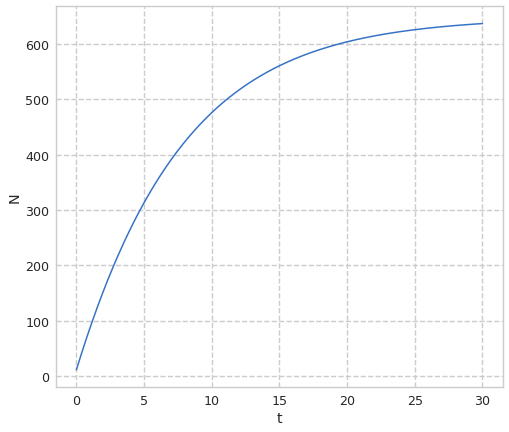

In [83]:
plt.plot(t, x)
plt.ylabel('N')
plt.xlabel('t')
plt.show()

### Модель 2

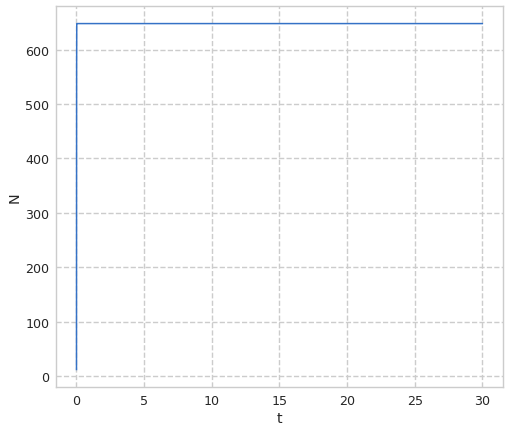

In [85]:
def k(t):
    return 0.000095

def p(t):
    return 0.92

x = odeint(XD, N0, t)

plt.plot(t, x)
plt.ylabel('N')
plt.xlabel('t')
plt.show()

In [86]:
diff = 0
ind = -1
for i in range(1, len(x[:,0])):
    if (x[i][0] - x[i-1][0]) > diff:
        diff = x[i][0] - x[i-1][0]
        ind = i
        
print('Максимальная скорость роста будет при t=' +str(t[ind]))

Максимальная скорость роста будет при t=0.01


## Модель 3

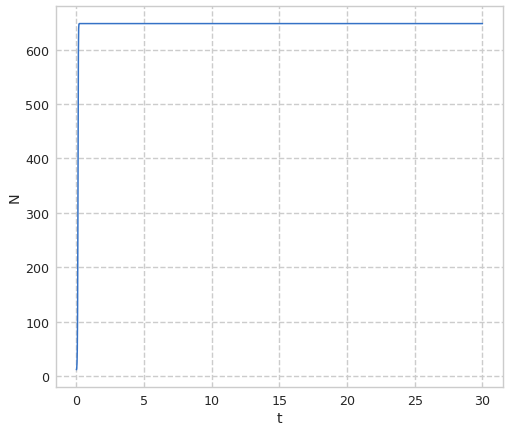

In [87]:
def k(t):
    return sin(10*t)

def p(t):
    return 0.9*t
    
x = odeint(XD, N0, t)

plt.plot(t, x)
plt.ylabel('N')
plt.xlabel('t')
plt.show()

# Выводы

Мы изучили простейшую модель эффективности рекламы, после чего успешно реализовали её с помощью языка Python и дополняющих его модулей.